In [2]:
using Plots, Printf, BenchmarkTools

# Homework

[//]: # "##### Write a Julia function of the bisection method that has the following specifications.

- The function name has to be `bisection_a`. (So that TA can test your code by simply pasting a test code to your homework.)

- An example of its usage is: `bisection_a(f, -1, 2, 1e-6, 10)`
   - `f` is the name of a function to be subjected for root-finding,   
   - `-1` is the lower bound of the initial bracket,
   - `2` is the upper bound of the initial bracket,
   - `1e-6` is the convergence criterion,
   - `10` is the maximum number of iterations.
   
- It should check whether the initial bracket contains the root.   
   
- If it hits the maximum number of iterations before convergence, it should print the result from the last iteration with an informative error message.

-  Consider the function $f(x) = x^3 + 4x^2 - 10$. 
  - Plot the function using `Plots`.
  - Use `bisection_a` to find the root of $f(x)$."






## The following `bisection` is a Julia program for root finding using the bisection method.
- Add comments to places marked by `##` to explain the lines.
  - For instance (a silly example): `iter=1   ## starts the iteration count`.
  - Your comments should be more extensive than what you normally do for your own code, because the purpose is to see if you understand the purpose of the code. 

In [2]:
function bisection(f::Function,a,b,eps,imax)
    f(a)f(b) < 0 || throw("The ($a, $b) does not contain the solution.")  ## check the existence of the root
    
    iter=1                           
    p=0.0      
    while iter <= imax                ##  set the maximum number of iterations preventing from the infinite loop
        p = a+(b-a)/2                 ##  find the midpoint
        if f(p) == 0 || abs(a-b)<eps  ##  if the error tolerance satisfied, return the answer
            return println("p is $p and the iteration number is $iter")
        end      
    
        f(a)f(p) < 0 ? b = p : a = p  ## update the interval
        
        iter += 1
    end
    y=f(p)                            ## last function value
    println("Maximum number of iterations is researched and the method did not converge. The last iteration gives $p with function value $y")   ##
end

bisection (generic function with 1 method)

-  Consider the function $f(x) = x^3 + 4x^2 - 10$. 
  - Plot the function using the `Plots` package.
  - Use `bisection` to find the root of $f(x)$. 

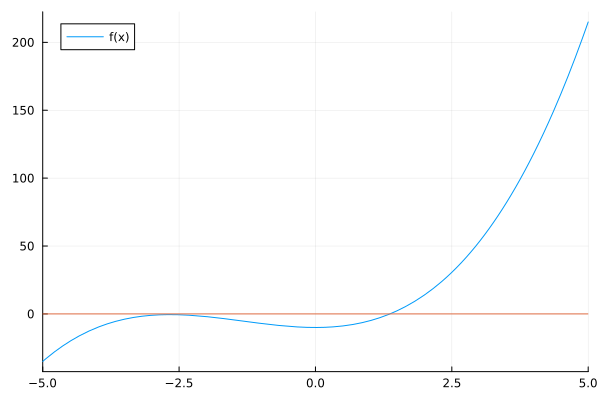

In [3]:
f = x -> x^3 + 4x^2 - 10
plot(f, xlim=[-5, 5], label="f(x)")
hline!([0], label="")

In [4]:
bisection(f, -5, 5, 1e-8, 2000)

p is 1.365230013616383 and the iteration number is 31


## Suppose you are dealing with functions that have multiple roots such as the `h(x)` given below.  In general, it is not possible to find all the roots for such functions without further information. Nevertheless, if the roots are reasonably spaced apart (e.g., the distance between them is much larger than the error tolerance used in checking convergence), we could find the roots that fall in a given interval $[a, b]$.

- Use the package `Plots` to plot the function $h(x) = 0.1 + \sin(x) + \cos(x) - 0.01x^3$ for $x$ in the range of $[-10, 10]$. 
  - The graph is to give you an idea of what multiple roots mean.

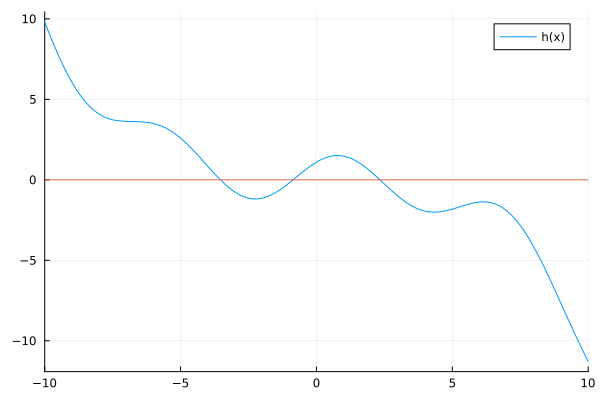

In [12]:
h(x) = 0.1 + sin(x) + cos(x) - 0.01x^3

plot(h, xlim=[-10, 10], label="h(x)")
hline!([0], label="")

- Modify `bisection` so that it can deal with functions that have multiple roots in the range of $[a,b]$.  Name the function `bisection_b`.
  - Hint: You may start from one end of the bracket, find the first root, use it to find the next one.
  - The function should not be tailored to $h(x)$ given above. It should be general enough for other multiple-roots functions.

- Suppose you are given the function $h(x) = 0.1 + \sin(x) + \cos(x) - 0.01x^3$ and you are NOT allowed to plot the function for inspection. The only information you have is that it has multiple roots in $[-7,7]$. Use `bisection_b` to find the roots of $h(x)$.

In [8]:
function bisection_b_1(f::Function, a, b, interval)
    roots=Float64[]
    
    c = a + interval
    while c <= b
        p = (a + c) / 2
        (f(p) == 0 || f(a)f(c) < 0) && push!(roots, p)
            
        a = c
        c = a + interval
    end
    
    return roots
end;

In [13]:
root1 = bisection_b_1(h, -7, 7, 1e-8)

3-element Vector{Float64}:
 -3.5341251960637536
 -0.8606883607648186
  2.3366872649912307

In [9]:
function bisection_b_2(f::Function, a, b, interval, roots=Float64[])
    p = (a + b) / 2
    if p - a < interval || b - p < interval
        f(a)f(p) < 0 && push!(roots, (a+p)/2)
        f(p)f(b) < 0 && push!(roots, (p+b)/2)
        return
    else
        bisection_b_2(f, a, p, interval, roots)
        bisection_b_2(f, p, b, interval, roots)
    end
    
    return roots
end;

In [14]:
root2 = bisection_b_2(h, -7, 7, 1e-8)

3-element Vector{Float64}:
 -3.5341251962818205
 -0.8606883543543518
  2.3366872644983232

In [7]:
function bisection_a(f::Function, a, b, eps, imax)
    iter = 1                           
    p = zero(float(Int))   
    while iter <= imax
        p = (a + b) / 2          
        if f(p) == 0 || abs(a-b)<eps
            return p
        end
    
        f(a)f(p) < 0 ? b = p : a = p 
        iter += 1
    end
    println("Maximum number of iterations is researched")
    return p
end

function bisection_b_boost(f::Function, a, b, eps, imax; warmup::Function, interval)
    _roots = warmup(f, a, b, interval)
    sub_interval = minimum(diff(_roots)) * 0.1
    roots = [
        bisection_a(f, i-sub_interval, i+sub_interval, eps, imax)
        for i in _roots
    ]
    
    
    return _roots, roots
end

Base.show(io::IO, f::Float64) = @printf(io, "%.16f", f);

In [14]:
_roots, roots = bisection_b_boost(
    h, -7, 7, 1e-8, 50; 
    warmup=bisection_b_1, interval=1e-4
)

[_roots roots root1]

3×3 Matrix{Float64}:
 -3.5341500000060089  -3.5341252006926123  -3.5341251960637536
 -0.8606500000028966  -0.8606883602581084  -0.8606883607648186
  2.3366499999975314   2.3366872607169196   2.3366872649912307

In [33]:
_roots, roots = bisection_b_boost(
    h, -7, 7, 1e-8, 50; 
    warmup=bisection_b_2, interval=1e-4
)

[_roots roots root2]

3×3 Matrix{Float64}:
 -3.5340995788574219  -3.5341251977427648  -3.5341251962818205
 -0.8607139587402344  -0.8606883557895115  -0.8606883543543518
  2.3366889953613281   2.3366872624714015   2.3366872644983232

In [30]:
@btime bisection_b_boost(
    h, -7, 7, 1e-8, 50; 
    warmup=bisection_b_1, interval=0.1
)

@btime bisection_b_boost(
    h, -7, 7, 1e-8, 50; 
    warmup=bisection_b_2, interval=0.1
);

  6.208 μs (4 allocations: 304 bytes)
  7.552 μs (10 allocations: 464 bytes)


In [31]:
@btime bisection_b_boost(
    h, -7, 7, 1e-8, 50; 
    warmup=bisection_b_1, interval=1e-6
)

@btime bisection_b_boost(
    h, -7, 7, 1e-8, 50; 
    warmup=bisection_b_2, interval=1e-6
);

  363.006 ms (4 allocations: 304 bytes)
  312.677 ms (10 allocations: 464 bytes)


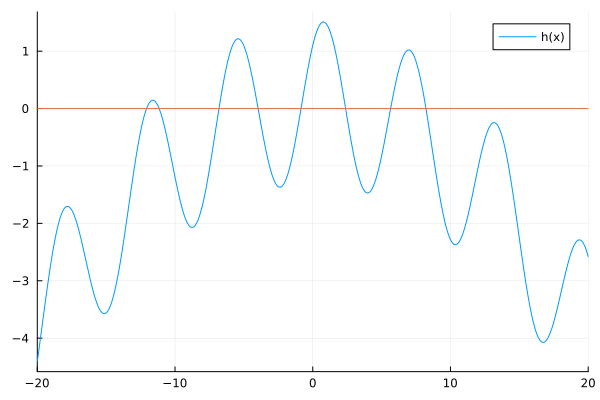

In [15]:
h(x) = 0.1 + sin(x) + cos(x) - 0.01x^2

plot(h, xlim=[-20, 20], label="h(x)")
hline!([0], label="")

In [16]:
root1 = bisection_b_1(h, -20, 20, 1e-8)

8-element Vector{Float64}:
 -12.0679864587023111
 -11.1521511829257669
  -6.8085826193564358
  -3.9676031666224056
  -0.8510346639094128
   2.3866329514945854
   5.6537322416388847
   8.2201204455923556

In [17]:
_roots, roots = bisection_b_boost(
    h, -20, 20, 1e-8, 50; 
    warmup=bisection_b_1, interval=1e-4
)

[_roots roots root1]

8×3 Matrix{Float64}:
 -12.0679500000184863  -12.0679864552342959  -12.0679864587023111
 -11.1521500000206206  -11.1521511872646766  -11.1521511829257669
  -6.8085500000307437   -6.8085826123968252   -6.8085826193564358
  -3.9676500000372208   -3.9676031680354154   -3.9676031666224056
  -0.8510500000331952   -0.8510346695737198   -0.8510346639094128
   2.3866499999673394    2.3866329445923595    2.3866329514945854
   5.6537499999668901    5.6537322458919608    5.6537322416388847
   8.2201499999609098    8.2201204498657106    8.2201204455923556

In [18]:
root2 = bisection_b_2(h, -20, 20, 1e-8)

8-element Vector{Float64}:
 -12.0679864520207047
 -11.1521511850878596
  -6.8085826141759753
  -3.9676031703129411
  -0.8510346664115787
   2.3866329481825233
   5.6537322467193007
   8.2201204495504498

In [19]:
_roots, roots = bisection_b_boost(
    h, -20, 20, 1e-8, 50; 
    warmup=bisection_b_2, interval=1e-4
)

[_roots roots root2]

8×3 Matrix{Float64}:
 -12.0679855346679688  -12.0679864544736120  -12.0679864520207047
 -11.1521530151367188  -11.1521511837136131  -11.1521511850878596
  -6.8085861206054688   -6.8085826133346927   -6.8085826141759753
  -3.9676284790039062   -3.9676031693370533   -3.9676031703129411
  -0.8510208129882812   -0.8510346701195886   -0.8510346664115787
   2.3866653442382812    2.3866329490656426    2.3866329481825233
   5.6537246704101562    5.6537322444773963    5.6537322467193007
   8.2201004028320312    8.2201204447692362    8.2201204495504498

In [20]:
@btime bisection_b_boost(
    h, -20, 20, 1e-8, 50; 
    warmup=bisection_b_1, interval=1e-4
)

@btime bisection_b_boost(
    h, -20, 20, 1e-8, 50; 
    warmup=bisection_b_2, interval=1e-4
);

  11.332 ms (4 allocations: 384 bytes)
  10.720 ms (10 allocations: 544 bytes)
